In [ ]:
#Import the libraries
from textblob import TextBlob
import sys
import re
import tweepy
import matplotlib.pyplot as plt

In [ ]:
def percentage(part, whole):
  return 100 * part/whole

In [ ]:
#Use the twitter API Keys for making the connection
consumerKey = "CreWemtKA5Dn2DckuU8BNEXN0"
consumerSecret = "pLUPNc2GzgHTRknmr4LsTqx3BMvqyl9K8E2q8m0NyrxgzRDCPp"
accessToken = "1110524950547447808-7kKoaVpybCLlPkIJYmXn9oUxjtMkbO"
accessTokenSecret = "B4w7oUssV3Onqjxqvjp7lTFLjWWJHyKTGAULNaqSn05R1"

auth = tweepy.OAuthHandler(consumer_key=consumerKey, consumer_secret=consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

searchTerm = input("Enter the keyword/hashtag to search about\n")
noOfSearchTerms = int(input("Enter how many tweets to analyze:\n"))

tweets = tweepy.Cursor(api.search, q=searchTerm, lang="English").items(noOfSearchTerms)

positive = 0
negative = 0
neutral = 0
polarity = 0

for tweet in tweets:
  print(tweet.text)
  analysis = TextBlob(tweet.text)
  polarity += analysis.sentiment.polarity
  if(analysis.sentiment.polarity == 0):
    neutral += 1
  elif(analysis.sentiment.polarity < 0.00):
    negative += 1
  elif(analysis.sentiment.polarity > 0.00):
    positive += 1

positive = percentage(positive, noOfSearchTerms)
negative = percentage(negative, noOfSearchTerms)
neutral = percentage(neutral, noOfSearchTerms)
polarity = percentage(polarity, noOfSearchTerms)

positive = format(positive, '.2f')
negatve = format(negative, '.2f')
neutral = format(neutral, '.2f')

print("How people are reacitng on " + searchTerm + " by analysing " + str(noOfSearchTerms) + "Tweets.")

if(polarity == 0):
  print("Neutral")
elif(polarity < 0.00):
  print("Negative")
elif(polarity > 0.00):
  print("Positive")




Enter the keyword/hashtag to search about
bitcoin
Enter how many tweets to analyze:
100
RT @iForex_com: #Bitcoin and other cryptos have been extremely volatile in 2019. Where is the #crypto market heading to next?
Find out more…
RT @iForex_com: #Bitcoin and other cryptos have been extremely volatile in 2019. Where is the #crypto market heading to next?
Find out more…
How people are reacitng on bitcoin by analysing 100Tweets.
Negative


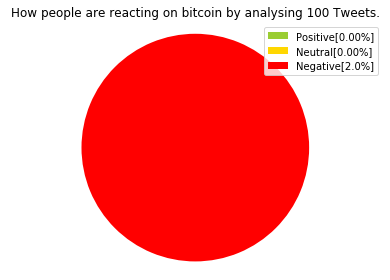

In [ ]:
labels = ['Positive['+str(positive)+'%]', 'Neutral['+str(neutral)+'%]', 'Negative['+str(negative)+'%]' ]
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']
patches, texts = plt.pie(sizes, colors=colors,startangle=90)
plt.legend(patches, labels, loc="best")
plt.title("How people are reacting on " + searchTerm + " by analysing " + str(noOfSearchTerms) + " Tweets.")
plt.axis('equal')
plt.tight_layout()
plt.show()